# Hierarical Clustring (Agglomerative-single Linkage)
### Importing packages

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

## Reading the dateset & Renaming columns lables

In [50]:
col_names = ['timeStamp', 'Gender', 'Grade', 'Age', 'Length', 'Weight', 'ShoesSize']
dataframe = pd.read_csv("../human_features.csv", names = col_names, skiprows=(0, ))

## Visualizing the data

In [51]:
x = dataframe.loc[:, 'Age']
y = dataframe.loc[:, 'Length']

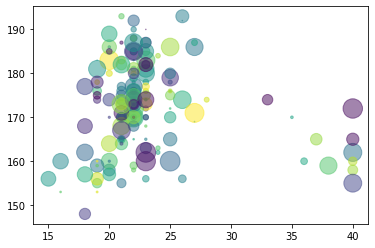

In [52]:
n = x.shape[0]
colors = np.random.rand(n)
size = pow(20 * np.random.rand(n), 2)
plt.scatter(x, y, s=size, c=colors, alpha=0.5)

## Creating Agglomerative Clusting model

In [53]:
cluster_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

### Training the model on the data

In [54]:
clustring = cluster_model.fit(dataframe.loc[:, ['Age', 'Length']])

In [55]:
clustring.labels_

array([120, 125, 157, 156, 155, 118, 153, 117, 152, 154, 116, 151, 150,
       115, 134, 148,  58,  86, 114, 128, 143, 142, 111, 112, 144, 147,
       110, 107, 133, 106,  76, 149, 131,  57,  91, 138, 113,  78, 105,
       132, 104, 108,  99, 139,  89,  85, 103,  71, 123,  55, 141,  70,
        80,  77, 137, 122,  97,  87,  84,  56,  68,  92, 126,  51, 109,
        53, 140,  45, 146, 101,  27,  52, 145,  83, 121,  28,  82, 136,
       119,  93,  90,  41,  95,  81,  62,  25,  54, 135,  75,  79, 102,
        42,  67, 124,  94,  98,  26, 127,  37,  61,  63,  96,  46, 129,
       100,  39, 130,  40,  60,  20,  30,  73,  88,  69,  59,  47,  72,
        74,  49,  66,  36,  44,  29,  50,  24,  13,  64,  65,  48,  43,
        38,  21,  34,  23,  14,  33,  31,  22,  32,  19,  15,  11,  16,
        35,  12,  10,   6,  18,   9,   7,   5,   4,   2,  17,   8,   3,
         1,   0])

In [56]:
clustring.labels_.shape

(158,)

In [57]:
clustring.children_

array([[  2,  37],
       [  3,  71],
       [  4,  39],
       [  9,  91],
       [  6,  19],
       [  8,  57],
       [ 11,  30],
       [ 12,  14],
       [ 31, 165],
       [ 15, 105],
       [111, 112],
       [ 68,  73],
       [ 72, 154],
       [ 24, 162],
       [ 20, 107],
       [ 21, 115],
       [ 50, 164],
       [113, 174],
       [ 66, 146],
       [ 35, 139],
       [ 60, 143],
       [ 77, 159],
       [142, 179],
       [157, 180],
       [ 28,  83],
       [138, 166],
       [ 32,  76],
       [126, 172],
       [103, 158],
       [156, 183],
       [100, 132],
       [ 62, 148],
       [ 84, 182],
       [ 99, 190],
       [ 93, 114],
       [ 55,  86],
       [108, 150],
       [  0,  25],
       [ 78, 116],
       [  5,  17],
       [  7, 131],
       [ 10,  34],
       [ 13,  42],
       [ 18,  22],
       [ 36, 136],
       [ 23,  59],
       [ 49,  94],
       [ 26,  56],
       [ 64, 137],
       [ 65,  97],
       [ 27,  33],
       [ 29,  52],
       [ 38,

In [59]:
clustring.children_.shape

(157, 2)

In [60]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

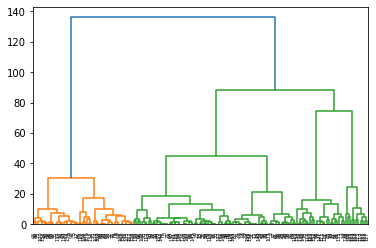

In [61]:
plot_dendrogram(clustring)

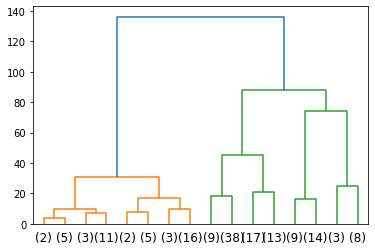

In [62]:
plot_dendrogram(clustring, truncate_mode="level", p=3 )